# TUTORIAL 01 : CAISO OASIS Renewables

## Renewables and emissions reports

_... renewables reports provide important information about actual renewable 
energy within the ISO grid as California moves towards a 33 percent 
renewable generation portfolio._
</br>
_See: http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx_

* [Daily Renewables Watch](http://content.caiso.com/green/renewrpt/DailyRenewablesWatch.pdf)
* [CAISO Interface Specification](http://www.caiso.com/Documents/OASIS-InterfaceSpecification_v5_1_8Clean_Independent2019Release.pdf#search=Interface%20Specification)
* [Wind Solar RTD & Curtailment](http://www.caiso.com/Documents/Wind_SolarReal-TimeDispatchCurtailmentReportOct21_2019.pdf#search=Real%20Time%20Dispatch)
* [Daily Renewables Watch (local)](./resources/docs/DailyRenewablesWatch.pdf)
* [CAISO Interface Specification (local)](./resources/docs/OASIS-InterfaceSpecification_v5_1_8Clean_Independent2019Release.pdf)
* [Wind Solar RTD & Curtailment (local)](./resources/docs/Wind_SolarReal-TimeDispatchCurtailmentReportOct21_2019.pdf)

### Setup

Download the renewables dataset

    curl -O https://s3.us-west-1.wasabisys.com/eap/energy-dashboard/data/data-oasis-daily-renewables-output/db/data-oasis-daily-renewables-output_00.db.gz
    
Unzip

    gunzip data-oasis-daily-renewables-output_00.db.gz

Verify the database

    sqlite3 data-oasis-daily-renewables-output_00.db
    > .tables
    > select count(*) from renewable;
    > select count(*) from total;

In [115]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
from pandasql import PandaSQL
pdf = PandaSQL('sqlite:///:memory:', persist=True)

# make graphs look modern and pretty
import seaborn as sns
sns.set()

# make tables look pretty
# (cribbed from Brandon Rhodes' tutorials)
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [84]:
peak_prod = df6.max()

geothermal         270.0
biomass            324.0
biogas             234.0
small_hydro        192.0
wind_total        2564.0
solar_pv          8553.0
solar_thermal      424.0
solar                0.0
renewables       10264.0
nuclear           1127.0
thermal          15349.0
imports           7849.0
hydro             2193.0
dtype: float64

### Renewables : 24 Hour Production

_Monday, October 28, 2019_

![24 Hour Production](./resources/images/renewables-01-24-hour-production.png)

### So how do we replicate this report?

In [2]:
# create the connection to the unzipped database in this directory
cnx = sqlite3.connect(r'./data-oasis-daily-renewables-output_00.db')

In [3]:
df1 = pd.read_sql("select * from renewable", cnx)
df1a = pd.read_sql("select * from total", cnx)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83442 entries, 0 to 83441
Data columns (total 11 columns):
id               0 non-null object
date             83442 non-null object
hour             83442 non-null int64
geothermal       83402 non-null float64
biomass          83402 non-null float64
biogas           83401 non-null float64
small_hydro      83399 non-null float64
wind_total       83374 non-null float64
solar_pv         60631 non-null float64
solar_thermal    60631 non-null float64
solar            22744 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 7.0+ MB


In [5]:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83447 entries, 0 to 83446
Data columns (total 8 columns):
id            0 non-null object
date          83447 non-null object
hour          83447 non-null int64
renewables    83397 non-null float64
nuclear       83422 non-null float64
thermal       83380 non-null float64
imports       83419 non-null float64
hydro         83407 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.1+ MB


In [23]:
df2 = df1.merge(df1a)
df2.head()

,id,date,hour,geothermal,biomass,biogas,small_hydro,wind_total,solar_pv,solar_thermal,solar,renewables,nuclear,thermal,imports,hydro
0,None,2011-05-30 00:00:00,1,960.0,367.0,155.0,510.0,1873.0,NaN,NaN,0.0,3864.0,3432.0,3225.0,6770.0,3678.0
1,None,2011-05-30 00:00:00,2,792.0,370.0,154.0,510.0,1965.0,NaN,NaN,0.0,3792.0,3433.0,3207.0,6336.0,3405.0
2,None,2011-05-30 00:00:00,3,771.0,368.0,154.0,509.0,1784.0,NaN,NaN,0.0,3586.0,3433.0,3244.0,5866.0,3534.0
3,None,2011-05-30 00:00:00,4,890.0,369.0,154.0,509.0,1627.0,NaN,NaN,0.0,3550.0,3433.0,3233.0,5660.0,3546.0
4,None,2011-05-30 00:00:00,5,996.0,373.0,154.0,510.0,1354.0,NaN,NaN,0.0,3387.0,3436.0,2886.0,5751.0,4044.0


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83441 entries, 0 to 83440
Data columns (total 16 columns):
id               0 non-null object
date             83441 non-null object
hour             83441 non-null int64
geothermal       83401 non-null float64
biomass          83401 non-null float64
biogas           83401 non-null float64
small_hydro      83398 non-null float64
wind_total       83374 non-null float64
solar_pv         60631 non-null float64
solar_thermal    60631 non-null float64
solar            22743 non-null float64
renewables       83391 non-null float64
nuclear          83416 non-null float64
thermal          83374 non-null float64
imports          83413 non-null float64
hydro            83401 non-null float64
dtypes: float64(13), int64(1), object(2)
memory usage: 10.8+ MB


In [25]:
df2['date'] = pd.to_datetime(df2['date'], infer_datetime_format=True)
df2.pop('id')
df2.fillna(0, inplace=True)

In [52]:
df3 = df2.set_index(['date', 'hour'])
df3.head()

geothermal  biomass  biogas  small_hydro  wind_total  \
date       hour                                                         
2011-05-30 1          960.0    367.0   155.0        510.0      1873.0   
           2          792.0    370.0   154.0        510.0      1965.0   
           3          771.0    368.0   154.0        509.0      1784.0   
           4          890.0    369.0   154.0        509.0      1627.0   
           5          996.0    373.0   154.0        510.0      1354.0   

                 solar_pv  solar_thermal  solar  renewables  nuclear  thermal  \
date       hour                                                                 
2011-05-30 1          0.0            0.0    0.0      3864.0   3432.0   3225.0   
           2          0.0            0.0    0.0      3792.0   3433.0   3207.0   
           3          0.0            0.0    0.0      3586.0   3433.0   3244.0   
           4          0.0            0.0    0.0      3550.0   3433.0   3233.0   
           5          0.0            0.0    0.0      3387.0   3436.0   2886.0   

                 imports   hydro  
date       hour                   
2011-05-30 1      6770.0  3678.0  
           2      6336.0  3405.0  
           3      5866.0  3534.0  
           4      5660.0  3546.0  
           5      5751.0  4044.0

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83441 entries, 2011-05-30 to 2012-06-22
Data columns (total 14 columns):
hour             83441 non-null int64
geothermal       83441 non-null float64
biomass          83441 non-null float64
biogas           83441 non-null float64
small_hydro      83441 non-null float64
wind_total       83441 non-null float64
solar_pv         83441 non-null float64
solar_thermal    83441 non-null float64
solar            83441 non-null float64
renewables       83441 non-null float64
nuclear          83441 non-null float64
thermal          83441 non-null float64
imports          83441 non-null float64
hydro            83441 non-null float64
dtypes: float64(13), int64(1)
memory usage: 9.5 MB


In [59]:
df4 = df3.sort_index()
df4.head()

geothermal  biomass  biogas  small_hydro  wind_total  \
date       hour                                                         
2010-04-20 1         1056.0    323.0   170.0        250.0       632.0   
           2         1055.0    318.0   169.0        245.0       632.0   
           3         1058.0    316.0   168.0        240.0       677.0   
           4         1063.0    318.0   168.0        238.0       923.0   
           5         1066.0    318.0   168.0        247.0       875.0   

                 solar_pv  solar_thermal  solar  renewables  nuclear  thermal  \
date       hour                                                                 
2010-04-20 1          0.0            0.0    0.0      2431.0   3854.0   7707.0   
           2          0.0            0.0    0.0      2419.0   3859.0   7357.0   
           3          0.0            0.0    0.0      2460.0   3870.0   6765.0   
           4          0.0            0.0    0.0      2710.0   3887.0   6544.0   
           5          0.0            0.0    0.0      2674.0   3894.0   6623.0   

                 imports   hydro  
date       hour                   
2010-04-20 1      4964.0  2514.0  
           2      4651.0  2012.0  
           3      4667.0  1914.0  
           4      4823.0  1902.0  
           5      4835.0  2213.0

In [77]:
df4.loc['2019-01'].head()

geothermal  biomass  biogas  small_hydro  wind_total  \
date       hour                                                         
2019-01-01 1          992.0    378.0   219.0        199.0      2790.0   
           2          992.0    379.0   207.0        201.0      2486.0   
           3          992.0    377.0   206.0        200.0      2392.0   
           4          993.0    375.0   206.0        199.0      2358.0   
           5          991.0    378.0   206.0        201.0      2315.0   

                 solar_pv  solar_thermal  solar  renewables  nuclear  thermal  \
date       hour                                                                 
2019-01-01 1          0.0            0.0    0.0      4578.0   2273.0   6412.0   
           2          0.0            0.0    0.0      4265.0   2274.0   6270.0   
           3          0.0            0.0    0.0      3175.0   2274.0   7170.0   
           4          0.0            0.0    0.0      4131.0   2274.0   6012.0   
           5          0.0            0.0    0.0      4091.0   2274.0   6091.0   

                 imports   hydro  
date       hour                   
2019-01-01 1      6299.0  2391.0  
           2      5996.0  2399.0  
           3      5900.0  2101.0  
           4      5914.0  1966.0  
           5      5857.0  2015.0

In [78]:
df5 = df4.loc['2019-10-28']
df5.head()

geothermal  biomass  biogas  small_hydro  wind_total  \
date       hour                                                         
2019-10-28 1          267.0    280.0   207.0        172.0      2564.0   
           2          267.0    276.0   206.0        172.0      2251.0   
           3          266.0    272.0   206.0        171.0      1824.0   
           4          267.0    274.0   206.0        172.0      1428.0   
           5          267.0    280.0   205.0        171.0      1140.0   

                 solar_pv  solar_thermal  solar  renewables  nuclear  thermal  \
date       hour                                                                 
2019-10-28 1          0.0            0.0    0.0      3490.0   1127.0   6956.0   
           2          0.0            0.0    0.0      3172.0   1126.0   6625.0   
           3          0.0            0.0    0.0      2473.0   1127.0   7004.0   
           4          0.0            0.0    0.0      2347.0   1127.0   6971.0   
           5          0.0            0.0    0.0      2063.0   1127.0   7532.0   

                 imports   hydro  
date       hour                   
2019-10-28 1      5168.0  2071.0  
           2      5198.0  2071.0  
           3      5163.0  2071.0  
           4      5253.0  2071.0  
           5      5345.0  2071.0

In [85]:
peak_prod_idx = df5.idxmax()
peak_prod_idx

geothermal       (2019-10-28 00:00:00, 18)
biomass          (2019-10-28 00:00:00, 13)
biogas           (2019-10-28 00:00:00, 19)
small_hydro       (2019-10-28 00:00:00, 8)
wind_total        (2019-10-28 00:00:00, 1)
solar_pv         (2019-10-28 00:00:00, 12)
solar_thermal    (2019-10-28 00:00:00, 11)
solar             (2019-10-28 00:00:00, 1)
renewables       (2019-10-28 00:00:00, 11)
nuclear           (2019-10-28 00:00:00, 1)
thermal          (2019-10-28 00:00:00, 19)
imports          (2019-10-28 00:00:00, 20)
hydro            (2019-10-28 00:00:00, 18)
dtype: object

In [177]:
peak_hour_dict = {}
for idx in peak_prod_idx.index:
    (_, hour) = peak_prod_idx[idx]
    peak_hour_dict[idx] = hour
peak_hour = pd.Series(peak_hour_dict)
peak_hour

geothermal       18
biomass          13
biogas           19
small_hydro       8
wind_total        1
solar_pv         12
solar_thermal    11
solar             1
renewables       11
nuclear           1
thermal          19
imports          20
hydro            18
dtype: int64

In [168]:
daily_peak = df5.max()
daily_peak

geothermal         270.0
biomass            324.0
biogas             234.0
small_hydro        192.0
wind_total        2564.0
solar_pv          8553.0
solar_thermal      424.0
solar                0.0
renewables       10264.0
nuclear           1127.0
thermal          15349.0
imports           7849.0
hydro             2193.0
dtype: float64

In [166]:
daily_total = df5.sum(axis='rows')
daily_total

geothermal         6429.0
biomass            7019.0
biogas             5195.0
small_hydro        4158.0
wind_total        20258.0
solar_pv          69583.0
solar_thermal      2751.0
solar                 0.0
renewables       115127.0
nuclear           27021.0
thermal          213202.0
imports          130822.0
hydro             50596.0
dtype: float64

In [181]:
series = [peak_hour, daily_peak, daily_total]
dfdaily = pd.DataFrame(series, index=['peak_hour', 'daily_peak', 'daily_total'])
dfdaily.transpose()

,peak_hour,daily_peak,daily_total
geothermal,18.0,270.0,6429.0
biomass,13.0,324.0,7019.0
biogas,19.0,234.0,5195.0
small_hydro,8.0,192.0,4158.0
wind_total,1.0,2564.0,20258.0
solar_pv,12.0,8553.0,69583.0
solar_thermal,11.0,424.0,2751.0
solar,1.0,0.0,0.0
renewables,11.0,10264.0,115127.0
nuclear,1.0,1127.0,27021.0


### Renewables : Hourly Average Breakdown 

![Hourly Average Breakdown](./resources/images/renewables-02-hourly-average-breakdown.png)

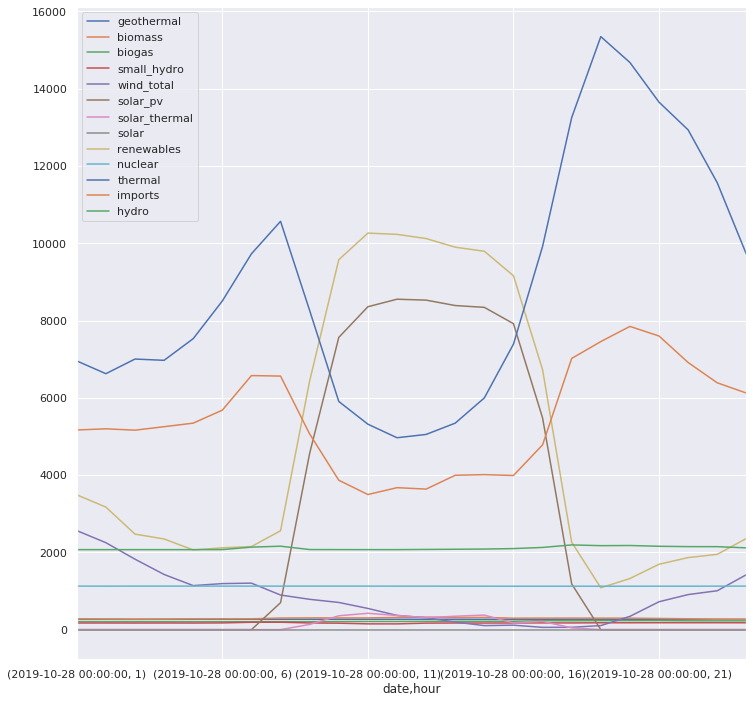

In [191]:
df5.plot(figsize=(12,12))

In [11]:
target_date = parser.parse('Monday, October 28, 2019')
target_date

datetime.datetime(2019, 10, 28, 0, 0)

KeyError: datetime.datetime(2019, 10, 28, 0, 0)

In [13]:
# create the connection to the unzipped database in this directory
cnx = sqlite3.connect(r'./data-oasis-sld-ren-fcst-dam_00.db')

In [14]:
# Read the database into a dataframe by joining report_header with report_data 
df1 = pd.read_sql("select report_data.trading_hub, report_data.renewable_type, report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx1)

# Convert gmt time strings to pandas datetime
df1['interval_start_ts'] = pd.to_datetime(df1['interval_start_gmt'])
df1['interval_end_ts'] = pd.to_datetime(df1['interval_end_gmt'])

# Drop unnec gmt columns
df1.drop(['interval_start_gmt', 'interval_end_gmt'], axis='columns', inplace=True)

# Set the index to be the start timestamp
df1 = df1.set_index('interval_start_ts', drop=True)
df1.head()

NameError: name 'cnx1' is not defined

In [ ]:
df1.info()

In [ ]:
df1.trading_hub.unique()

In [ ]:
df1.renewable_type.unique()

In [ ]:
df1.mkt_type.unique()

In [ ]:
df1.data_item.unique()

In [ ]:
for title, group in df1.groupby(['renewable_type']):
    group.plot.line(y='value', title=title)

![Trading Hubs](./resources/images/caiso-regions.png)

In [ ]:
for title, group in df1.groupby(['trading_hub']):
    group.plot.line(y='value', title=title)


In [ ]:
### Renewables : Wind and Solar Summary

In [ ]:
# create the connection to the unzipped database in this directory
cnx2  = sqlite3.connect(r'./data-oasis-ene-wind-solar-summary_00.db')

In [ ]:
# read the database into a dataframe by joining report_header with report_data 
df2 = pd.read_sql("select report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx2)

# convert gmt time strings to pandas datetime
df2['interval_start_ts'] = pd.to_datetime(df2['interval_start_gmt'])
df2['interval_end_ts'] = pd.to_datetime(df2['interval_end_gmt'])

# drop unnec gmt columns
df2.drop(['interval_start_gmt', 'interval_end_gmt'], axis='columns', inplace=True)

# set the index to be the start timestamp
df2 = df2.set_index('interval_start_ts', drop=True)
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.data_item.unique()

In [ ]:
for title, group in df2.groupby(['data_item']):
    group.plot.line(y='value', title=title)

## Data Items Explained

### DAM : Day Ahead Market

http://www.ercot.com/mktinfo/dam/

    Day-Ahead Market

    The Day-Ahead Market (DAM) is a voluntary, financially-binding forward energy market. The DAM matches willing buyers and sellers, subject to network security and     other constraints, whereby energy is co-optimized with Ancillary Services and certain Congestion Revenue Rights. It provides a platform to hedge congestion costs in the day-ahead of the Operating Day, and instruments to mitigate the risk of price volatility in Real-Time.


### RTM : Real Time Market

http://www.ercot.com/mktinfo/rtm

    Real-Time Market

    During real-time, ERCOT dispatches resources based on economics and reliability to meet the system demand while observing resource and transmission constraints. Security Constrained Economic Dispatch (SCED) is the real-time market evaluation of offers to produce a least-cost dispatch of online resources. SCED calculates Locational Marginal Prices (LMPs) using a two-step methodology that applies mitigation to resolve non-competitive constraints.

### RTD : Real Time Dispatch